## Système dissipatif avec oscillation linéaire (régime d'oscillation libre)


In [16]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: right;
    vertical-align: middle;
}
</style>
""")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 18})

### Equation de mouvement




Amortissement "sous-critique" :  \begin{equation} \delta <0 \end{equation}

\begin{equation}
\begin{cases}
x(t)=e^{-\xi \omega_{0} t} \left( x_{0} cos(\omega_{0}\sqrt{1-\xi^{2}}t)+\frac{\dot{x}_{0}}{\omega_{0}\sqrt{1-\xi^{2}}}sin(\omega_{0}\sqrt{1-\xi^{2}}t) \right) \\
r_{1,2}=\left( -\xi \pm i\sqrt{1-\xi^{2}} \right) \omega_{0}
\end{cases} \nonumber
\end{equation}

- Force extérieure : $F(t)\vec{x}$
- Force dûe à la raideur du ressort : $\vec{F}_{ressort} = -kx\vec{x}$
- Force de frottement visqueux due à l'amortisseur :  $\vec{F}_{amoortisseur} = -b\dot{x}\vec{x}$

### Tracé temporel 

In [20]:
k=100 # raideur [N/m]
m=1.6 # masse [kg]
omega_0=np.sqrt(k/m) # pulsation propre
# conditions initiales
x0=0.2 # position de lâché

# vitesses de lâché
x0_prime0=0
#x0_primem1=-1
#x0_prime1=1

t=np.arange(0,10*2*np.pi/omega_0,0.001) # temps

xi est= 0.015811388300841896


Text(0, 0.5, '$x \\, (m)$')

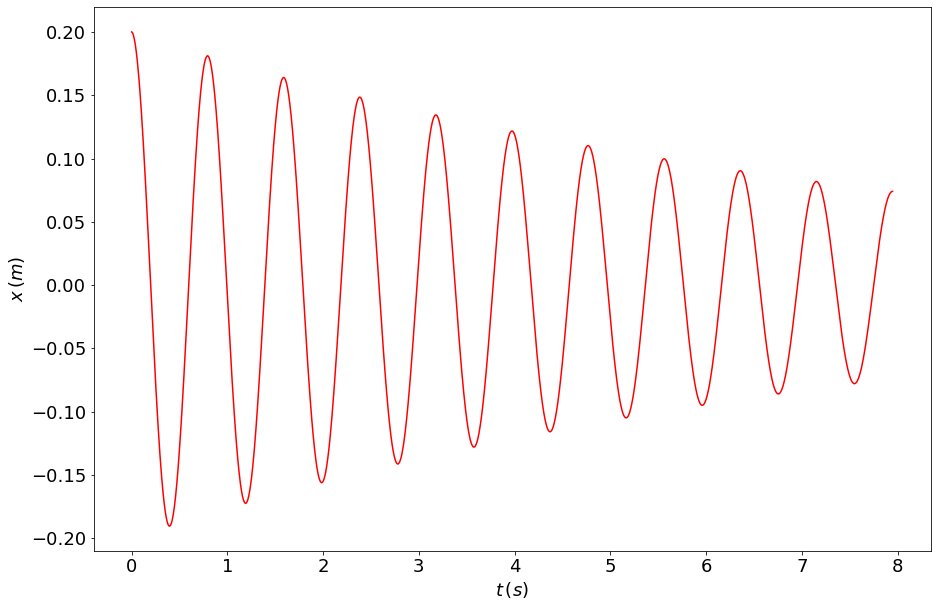

In [22]:
##calcul sur notre cas 

##on sait que notre système est sous-amorti et par simulation, on a b= 0.4 ainsi on la courbe suivante

# Cas dissipatif sous-amortis
b_sousamorti=0.4; xi_sousamorti1=(b_sousamorti)/(2*m*omega_0);
print("xi est=",xi_sousamorti1);
x_diss_sousamorti1=np.exp(-xi_sousamorti1*omega_0*t)*(x0*np.cos(omega_0*np.sqrt(1-xi_sousamorti1**2)*t)+x0_prime0/omega_0/np.sqrt(1-xi_sousamorti1**2)*np.sin(omega_0*np.sqrt(1-xi_sousamorti1**2)*t))

plt.plot(t,x_diss_sousamorti1,'r')

plt.xlabel("$t \, (s)$")
plt.ylabel("$x \, (m)$")

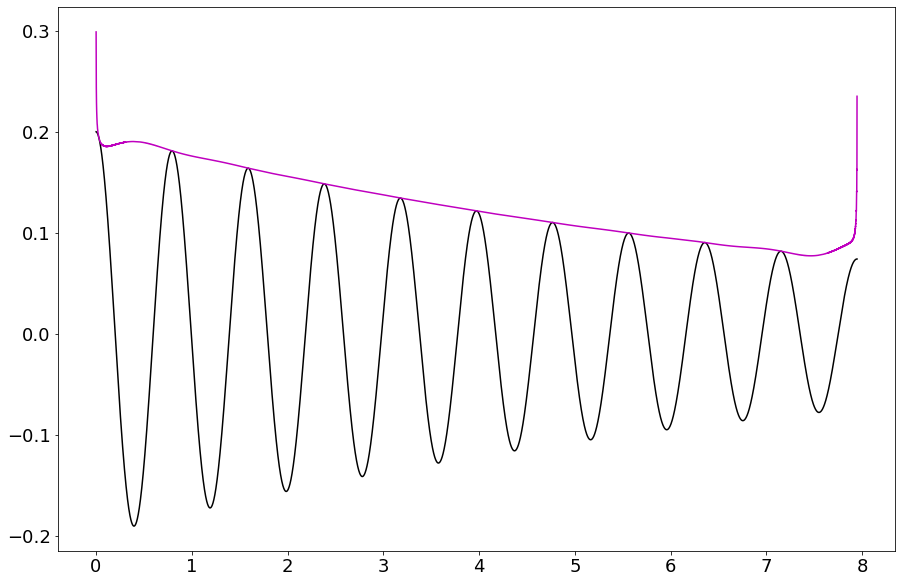

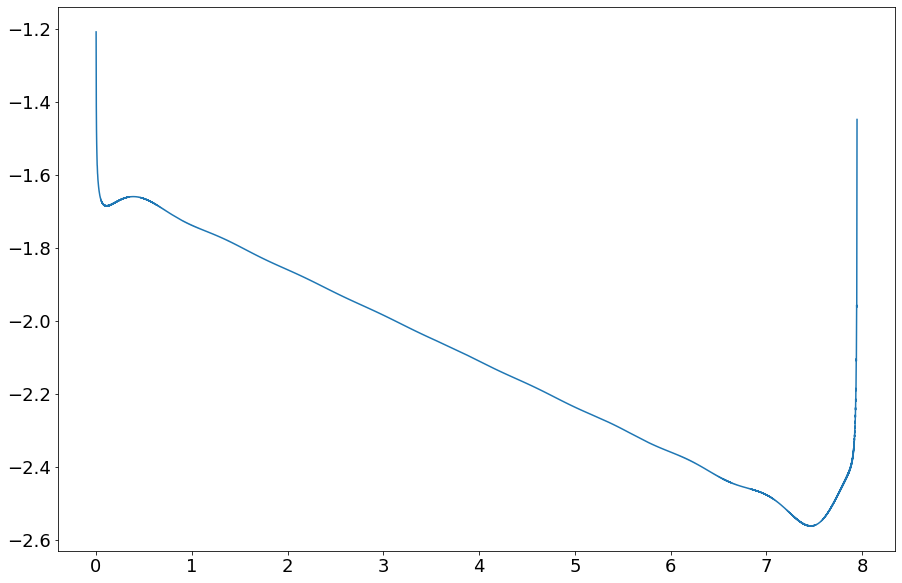

In [26]:
from scipy.signal import hilbert

hilbert_sousamorti1=hilbert(x_diss_sousamorti1)
env_sousamorti1=np.abs(hilbert_sousamorti1)

plt.plot(t,x_diss_sousamorti1,'k')
plt.plot(t,env_sousamorti1,'m')

plt.figure(2)
plt.plot(t,np.log(env_sousamorti1))


## Système dissipatif à oscillation forcée 

Fonction de transfert :
\begin{equation}
kH(\omega)=\frac{X_{0}(\omega)}{F_{0}/k}=\frac{1}{1-\frac{\omega^{2}}{\omega_{0}^{2}}+i2\xi\frac{\omega}{\omega_{0}}}e^{-i\phi} \nonumber
\end{equation}

Facteur d'amplification dynamique :
\begin{equation}
\vert kH(\omega) \vert=\frac{1}{\sqrt{\left( 1-\frac{\omega^{2}}{\omega_{0}^{2}} \right)^{2} +4\xi^{2}\frac{\omega^{2}}{\omega^{2}_{0}}}}
\end{equation}

Pulsation de résonnance en déplacement :
\begin{equation}
\omega_{d}=\omega_{0}\sqrt{1-2\xi^{2}} \nonumber
\end{equation}

Amplification dynamique maximale :
\begin{equation}
\vert kH(\omega_{d}) \vert=\frac{1}{2\xi\sqrt{1-\xi^{2}}} \nonumber
\end{equation}

<ipython-input-27-eed864e04ce5>:8: RuntimeWarning: invalid value encountered in sqrt
  omega_d=omega_0*np.sqrt(1-2*xi**2)
<ipython-input-27-eed864e04ce5>:9: RuntimeWarning: invalid value encountered in sqrt
  kH_mod_max=1/2/xi/np.sqrt(1-xi**2)


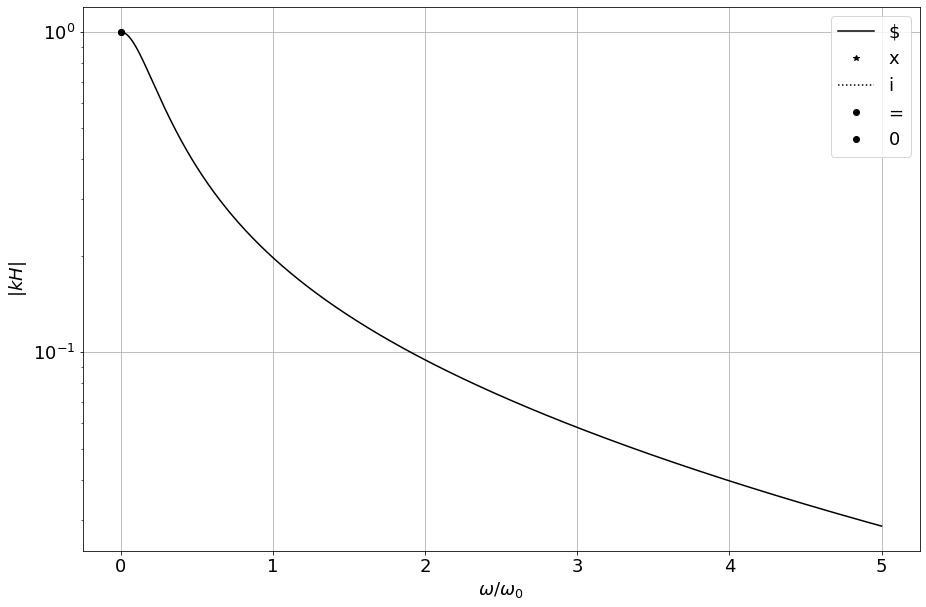

In [27]:
omega=np.arange(0.0001,5,0.0002)*omega_0

b = 0.4
xi = b/2*(m*omega_0)

kH=1/(1-(omega**2)/(omega_0**2)+1j*2 *xi*omega/omega_0)
kH_mod=1/np.sqrt((1-(omega**2)/(omega_0**2))**2+4*xi**2*(omega**2)/(omega_0**2))
omega_d=omega_0*np.sqrt(1-2*xi**2)
kH_mod_max=1/2/xi/np.sqrt(1-xi**2)


# Détermination de la largeur de bande à -3dB
kH_mod_max_sqrt2=kH_mod_max/np.sqrt(2)

ii_omega_1=1
ii_omega_2=1

diff_omega_1=kH_mod_max
diff_omega_2=kH_mod_max

for ii in range(len(omega)):
    if (np.abs(kH_mod[ii]-kH_mod_max_sqrt2)<diff_omega_1) and (omega[ii]<omega_d):
        diff_omega_1=np.abs(kH_mod[ii]-kH_mod_max_sqrt2)
        ii_omega_1=ii

    if (np.abs(kH_mod[ii]-kH_mod_max_sqrt2)<diff_omega_2) and (omega[ii]>omega_d):
        diff_omega_2=np.abs(kH_mod[ii]-kH_mod_max_sqrt2)
        ii_omega_2=ii
        
delta_omega=omega[ii_omega_2]-omega[ii_omega_1]

plt.semilogy(omega/omega_0,kH_mod,'k')
plt.plot(omega_d/omega_0,kH_mod_max,'k*')
plt.plot([omega[1]/omega_0,omega[-1]/omega_0],[kH_mod_max_sqrt2,kH_mod_max_sqrt2],'k:')

plt.plot(omega[ii_omega_1]/omega_0,kH_mod[ii_omega_1],'ko')
plt.plot(omega[ii_omega_2]/omega_0,kH_mod[ii_omega_2],'ko')

plt.grid()
plt.xlabel("$\omega/\omega_{0}$")
plt.ylabel("$| kH |$")
plt.legend("$xi=0.01$");


### Resonance en vitesse

Déphasage :
\begin{equation}
tan(\phi)(\omega)=\frac{2 \xi \frac{\omega}{\omega_{0}}}{1-\frac{\omega^{2}}{\omega_{0}^{2}}}
\end{equation}

Text(0, 0.5, '$tan^{-1}(tan(\\phi))/\\pi$')

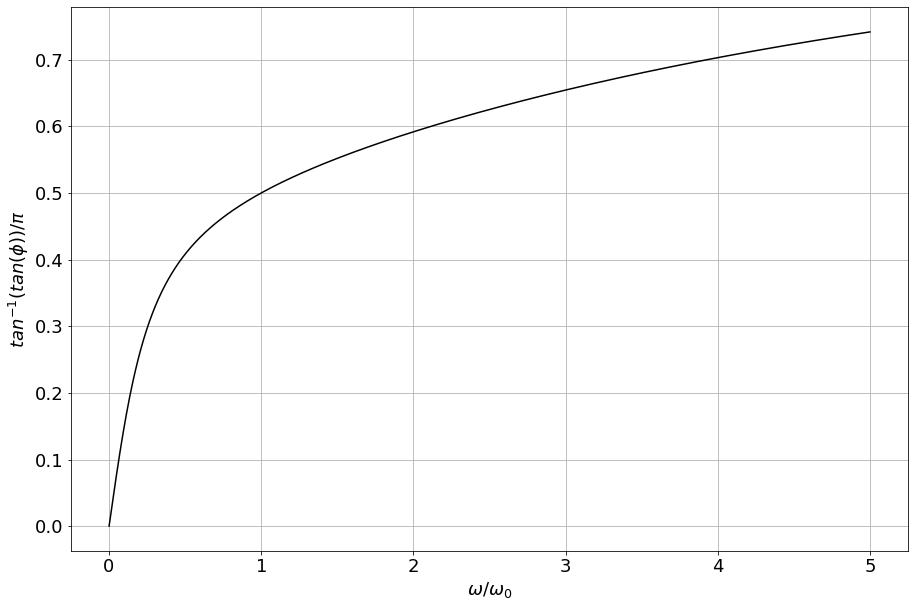

In [28]:
tan_phi_m=2*xi*omega/omega_0/(1-(omega**2)/(omega_0**2));

# Recalage pour affichage
phi_m_corr=np.zeros(tan_phi_m.shape)


for ii in range(len(np.arctan(tan_phi_m))):
    if np.arctan(tan_phi_m[ii])>0:
        phi_m_corr[ii]=np.arctan(tan_phi_m[ii])
    else:
        phi_m_corr[ii]=np.arctan(tan_phi_m[ii])+np.pi
        

plt.plot(omega/omega_0,phi_m_corr/np.pi,'k')

plt.grid()
plt.xlabel("$\omega/\omega_{0}$")
plt.ylabel("$tan^{-1}(tan(\phi))/\pi$")


### Résonnance en accélération

Réponse complexe en accélération :
\begin{equation}
\frac{\Gamma_{0}(\omega)}{F_{0}/k}=-\frac{\omega^{2}}{1-\frac{\omega^{2}}{\omega_{0}^{2}}+i2\xi\frac{\omega}{\omega_{0}}} \nonumber
\end{equation}

Inertance :
\begin{equation}
\left\vert \frac{\Gamma_{0}(\omega)}{F_{0}/k} \right\vert=\frac{\omega^{2}}{\sqrt{\left( 1-\frac{\omega^{2}}{\omega_{0}^{2}} \right)^{2}+4\xi^{2}\frac{\omega^{2}}{\omega_{0}^{2}}}}
\end{equation}

Pulsation de résonnance en accélération :
\begin{equation}
\omega_{\Gamma}=\frac{\omega_{0}}{\sqrt{1-2\xi^{2}}}=\frac{\omega_{0}^{2}}{\omega_{d}} \nonumber
\end{equation}

Inertance maximale :
\begin{equation}
\left\vert \frac{\Gamma_{0}}{F_{0}/k} \right\vert(\omega_{\Gamma})=\frac{\omega_{0}^{2}}{2 \xi \sqrt{1-\xi^{2}}} \nonumber
\end{equation}

<ipython-input-29-7d9bf30496bc>:4: RuntimeWarning: invalid value encountered in sqrt
  omega_g_m=omega_0/np.sqrt(1-2*xi**2)
<ipython-input-29-7d9bf30496bc>:5: RuntimeWarning: invalid value encountered in sqrt
  kHa_mod_max_m=omega_0**2/(2*xi*np.sqrt(1-xi**2))


Text(0, 0.5, '$k| \\Gamma_{0}/F_{0} |$')

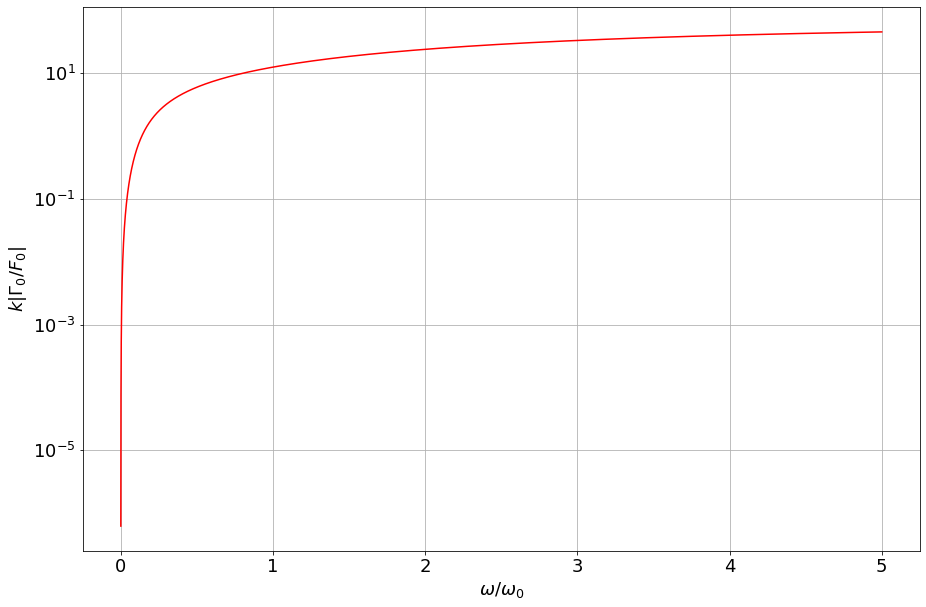

In [29]:
# Cas sous-amorti
kHa_m=-omega**2/(1-(omega**2)/(omega_0**2)+1j*2*xi*omega/omega_0)
kHa_mod_m=omega**2/np.sqrt((1-(omega**2)/(omega_0**2))**2+4*xi**2*(omega**2)/(omega_0**2))
omega_g_m=omega_0/np.sqrt(1-2*xi**2)
kHa_mod_max_m=omega_0**2/(2*xi*np.sqrt(1-xi**2))






plt.semilogy(omega/omega_0,kHa_mod_m,'r')


plt.semilogy(omega_g_m/omega_0,kHa_mod_max_m,'k*')

plt.grid()
plt.xlabel("$\omega/\omega_{0}$")
plt.ylabel("$k| \Gamma_{0}/F_{0} |$")

### Résonance en puissance

Puissance dissipée moyenne sur une période T :
\begin{equation}
<P_{diss}>(\omega)=\frac{b}{2} \frac{F_{0}^{2} \omega^{2} /k^{2}}{\left( 1-\frac{\omega^{2}}{\omega_{0}^{2}} \right)^{2}+4\xi^{2} \frac{\omega^{2}}{\omega_{0}^{2}}}
\end{equation}

Puissance dissipée maximale :
\begin{equation}
<P_{diss}>(\omega_{P}=\omega_{0})=\frac{1}{2} \frac{F_{0}^{2}}{b} \nonumber
\end{equation}

In [ ]:
bm=xi*2*m*omega_0;
F0=1;

# Cas sous-amorti
Pdiss_m=b/2*(F0*omega/k)**2/((1-(omega**2)/(omega_0**2))**2+4*xi**2*(omega**2)/(omega_0**2))
Pdiss_max_m=1/2*(F0**2)/b



plt.semilogy(omega/omega_0,Pdiss_m,'k')

plt.semilogy(1,Pdiss_max_m,'k*');

plt.grid()
plt.xlabel("$\omega/\omega_{0}$")
plt.ylabel("$<P_{diss}>$")


### Diagramme de Bode 

\begin{equation}
\vert H(\omega) \vert _{dB}=20 \text{log} \left( \frac{k_{0}/k}{\sqrt{\left( 1-\left( \frac{\omega}{\omega_0} \right)^{2} \right)^{2} +4\xi^{2}\left( \frac{\omega}{\omega_0} \right)^{2}}} \right)
\end{equation}

In [ ]:
k0=k;
H_mod_dB_ref_m=20*np.log((k0/k)/np.sqrt((1-(omega**2)/(omega_0**2))**2+4*xi**2*(omega**2)/(omega_0**2)))


#H_mod_dB_ms2_m=20*np.log((k0/k)/np.sqrt((1-(omega**2)/(omega_0_ms2**2))**2+4*xim3**2*(omega**2)/(omega_0_ms2**2)))


plt.plot(omega/omega_0,H_mod_dB_ref_m,'k')

plt.xlabel("$\omega/\omega_{0}$")
plt.ylabel("$| k\Gamma_{0}/F_{0} |$")
plt.grid()